# About Analysis : Anomaly Detection on Machine Learning 
    
   - 2018-12-10, SKH Data Science Unit, KeeJooBae

-----
# Library

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os,sys,tarfile,fnmatch
from datetime import datetime
import itertools 

import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)

%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

from sklearn import mixture

---
# Data

In [4]:
fileList = os.listdir()
fileList

['Intensive_Analytics_AD_ML_practice_20181210.ipynb',
 'Intensive_Analytics_AD_ML_assignment_20181211.ipynb',
 '1807_TOY_X.tar',
 '.ipynb_checkpoints']

In [4]:
tar = ##(os.path.join('1807_TOY_X.tar'))
len(tar.getnames()); tar.getnames()[0:5]

8064

['TOY_X',
 'TOY_X/33154_0_20180719_201807191200_.csv',
 'TOY_X/28355_21_20180729_201807292000_.csv',
 'TOY_X/33538_4_20180707_201807072000_.csv',
 'TOY_X/28074_1_20180727_201807271700_.csv']

In [5]:
f = tar.extractfile(tar.getnames()[1])
sample = pd.read_csv(f, header=0)

sample.shape; sample.head(3)

(419, 24)

,EVT_DTM,VEND_ID,ENB_ID,CELL_ID,FREQ_TYP_CD,UE_CONN_TOT_CNT,TA,CQI,RSRP,RSRQ,DL_PACKET_LOSS_RATE,SINR,UE_TX_POWER,PHR,UL_PACKET_LOSS_RATE,RRC_LATENCY,HO_LATENCY,RRE_LATENCY,ERAB_LATENCY,RRC_ERAB_LATENCY,DL_NO_RTP,UL_NO_RTP,DL_PRB_USAGE_RATE,UL_PRB_USAGE_RATE
0,20180719115000,ELG,33154,0,5,89,7.5,11.4,NaN,NaN,0,8.7,20.3,13.2,0.0,49.0,93.2,NaN,46.7,95.7,0,0,13.0,3.9
1,20180719115010,ELG,33154,0,5,84,7.6,11.7,NaN,NaN,0,8.6,17.6,16.9,0.1,29.9,87.3,NaN,42.8,72.7,0,0,13.0,3.9
2,20180719115020,ELG,33154,0,5,85,6.8,11.5,NaN,NaN,0,7.9,19.8,13.9,0.0,28.7,90.5,NaN,45.0,73.7,0,0,13.0,3.9


In [6]:
for member in tar.getnames()[2:1000]:
    f = tar.extractfile(member)
    fpd = pd.read_csv(f, header = 0)
    sample = sample.append(fpd)

sample.shape; sample.head(3); sample.tail(3)

(401100, 24)

,EVT_DTM,VEND_ID,ENB_ID,CELL_ID,FREQ_TYP_CD,UE_CONN_TOT_CNT,TA,CQI,RSRP,RSRQ,DL_PACKET_LOSS_RATE,SINR,UE_TX_POWER,PHR,UL_PACKET_LOSS_RATE,RRC_LATENCY,HO_LATENCY,RRE_LATENCY,ERAB_LATENCY,RRC_ERAB_LATENCY,DL_NO_RTP,UL_NO_RTP,DL_PRB_USAGE_RATE,UL_PRB_USAGE_RATE
0,20180719115000,ELG,33154,0,5,89,7.5,11.4,NaN,NaN,0.0,8.7,20.3,13.2,0.0,49.0,93.2,NaN,46.7,95.7,0,0,13.0,3.9
1,20180719115010,ELG,33154,0,5,84,7.6,11.7,NaN,NaN,0.0,8.6,17.6,16.9,0.1,29.9,87.3,NaN,42.8,72.7,0,0,13.0,3.9
2,20180719115020,ELG,33154,0,5,85,6.8,11.5,NaN,NaN,0.0,7.9,19.8,13.9,0.0,28.7,90.5,NaN,45.0,73.7,0,0,13.0,3.9


,EVT_DTM,VEND_ID,ENB_ID,CELL_ID,FREQ_TYP_CD,UE_CONN_TOT_CNT,TA,CQI,RSRP,RSRQ,DL_PACKET_LOSS_RATE,SINR,UE_TX_POWER,PHR,UL_PACKET_LOSS_RATE,RRC_LATENCY,HO_LATENCY,RRE_LATENCY,ERAB_LATENCY,RRC_ERAB_LATENCY,DL_NO_RTP,UL_NO_RTP,DL_PRB_USAGE_RATE,UL_PRB_USAGE_RATE
417,20180704110940,ELG,33154,0,5,73,9.4,12.2,NaN,NaN,0.0,7.7,19.2,20.3,0.8,31.2,92.3,NaN,46.1,77.3,0,0,25.8,8.5
418,20180704110850,ELG,33154,0,5,73,9.6,11.6,NaN,NaN,0.0,9.3,17.8,22.0,0.7,34.9,81.6,NaN,46.8,81.7,0,0,25.8,8.5
419,20180704110950,ELG,33154,0,5,95,9.2,11.1,NaN,NaN,0.0,7.2,16.0,24.8,0.1,32.1,98.1,NaN,46.0,78.1,0,0,21.1,10.6


-----
# Data Understanding 

## FREQ_TYP_CD 

  - 1 : 800MHz
  - 5 : 1.8MHz
  - 10: 2.1GHz

In [7]:
pd.crosstab(sample['FREQ_TYP_CD'],sample['FREQ_TYP_CD'])

FREQ_TYP_CD,1,5,10
FREQ_TYP_CD,,,
1,124486,0,0
5,0,151841,0
10,0,0,124773


### Downlink

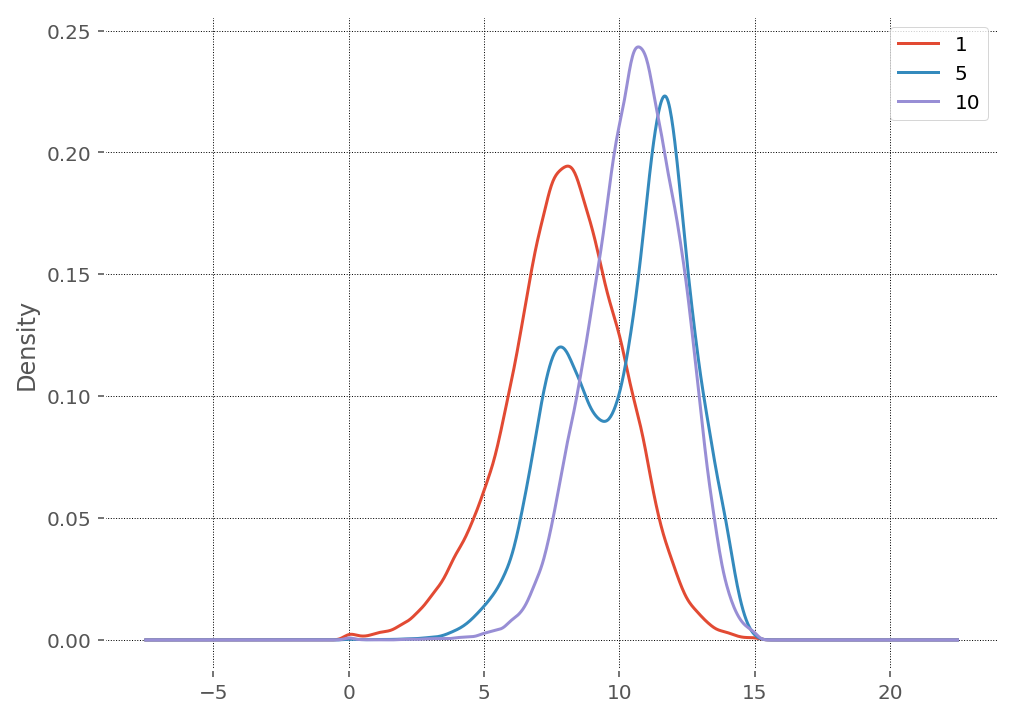

In [8]:
p_df = pd.DataFrame({"group":sample['FREQ_TYP_CD'], "value":sample['CQI']})
fig,ax = plt.subplots(figsize=(8,6))

for label,df in p_df.groupby('group'):
    df.value.plot(kind="kde", ax=ax, label=label)
plt.legend()

### Uplink

### Usage

## Periodicity

In [11]:
sample['EVT_DTM']  = ##(sample['EVT_DTM'], format="%Y%m%d%H%M%S")
sample['DAY']      = sample['EVT_DTM'].##
sample['WEEK_NUM'] = sample['EVT_DTM'].##
sample['DATE']     = sample['EVT_DTM'].##
sample['TIME']     = sample['EVT_DTM'].##

sample.head(3); sample.tail(3)

,EVT_DTM,VEND_ID,ENB_ID,CELL_ID,FREQ_TYP_CD,UE_CONN_TOT_CNT,TA,CQI,RSRP,RSRQ,DL_PACKET_LOSS_RATE,SINR,UE_TX_POWER,PHR,UL_PACKET_LOSS_RATE,RRC_LATENCY,HO_LATENCY,RRE_LATENCY,ERAB_LATENCY,RRC_ERAB_LATENCY,DL_NO_RTP,UL_NO_RTP,DL_PRB_USAGE_RATE,UL_PRB_USAGE_RATE,DAY,WEEK_NUM,DATE,TIME
0,2018-07-19 11:50:00,ELG,33154,0,5,89,7.5,11.4,NaN,NaN,0.0,8.7,20.3,13.2,0.0,49.0,93.2,NaN,46.7,95.7,0,0,13.0,3.9,Thursday,29,2018-07-19,11:50:00
1,2018-07-19 11:50:10,ELG,33154,0,5,84,7.6,11.7,NaN,NaN,0.0,8.6,17.6,16.9,0.1,29.9,87.3,NaN,42.8,72.7,0,0,13.0,3.9,Thursday,29,2018-07-19,11:50:10
2,2018-07-19 11:50:20,ELG,33154,0,5,85,6.8,11.5,NaN,NaN,0.0,7.9,19.8,13.9,0.0,28.7,90.5,NaN,45.0,73.7,0,0,13.0,3.9,Thursday,29,2018-07-19,11:50:20


,EVT_DTM,VEND_ID,ENB_ID,CELL_ID,FREQ_TYP_CD,UE_CONN_TOT_CNT,TA,CQI,RSRP,RSRQ,DL_PACKET_LOSS_RATE,SINR,UE_TX_POWER,PHR,UL_PACKET_LOSS_RATE,RRC_LATENCY,HO_LATENCY,RRE_LATENCY,ERAB_LATENCY,RRC_ERAB_LATENCY,DL_NO_RTP,UL_NO_RTP,DL_PRB_USAGE_RATE,UL_PRB_USAGE_RATE,DAY,WEEK_NUM,DATE,TIME
417,2018-07-04 11:09:40,ELG,33154,0,5,73,9.4,12.2,NaN,NaN,0.0,7.7,19.2,20.3,0.8,31.2,92.3,NaN,46.1,77.3,0,0,25.8,8.5,Wednesday,27,2018-07-04,11:09:40
418,2018-07-04 11:08:50,ELG,33154,0,5,73,9.6,11.6,NaN,NaN,0.0,9.3,17.8,22.0,0.7,34.9,81.6,NaN,46.8,81.7,0,0,25.8,8.5,Wednesday,27,2018-07-04,11:08:50
419,2018-07-04 11:09:50,ELG,33154,0,5,95,9.2,11.1,NaN,NaN,0.0,7.2,16.0,24.8,0.1,32.1,98.1,NaN,46.0,78.1,0,0,21.1,10.6,Wednesday,27,2018-07-04,11:09:50


In [12]:
pd.unique(sample['WEEK_NUM'])

array([29, 30, 27, 28, 31, 26])

### Downlink

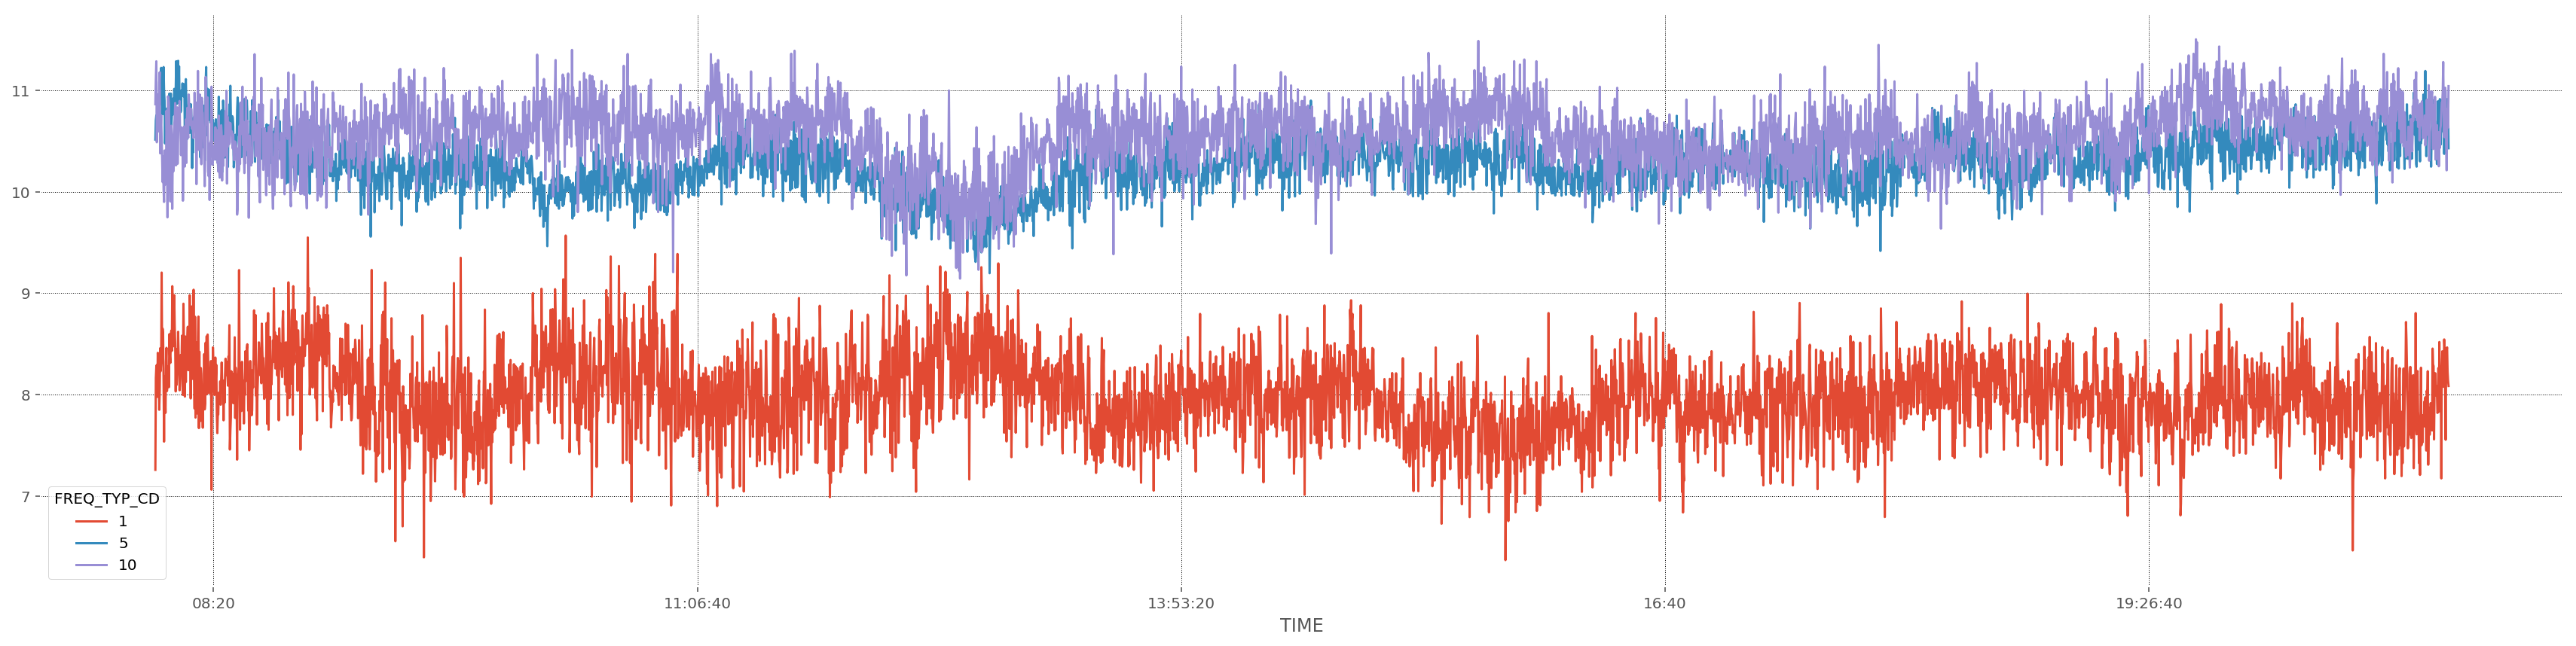

In [13]:
fig,ax = plt.subplots(figsize=(30,7))
sample.groupby(['TIME','FREQ_TYP_CD']).mean()['CQI'].unstack().plot(ax=ax)

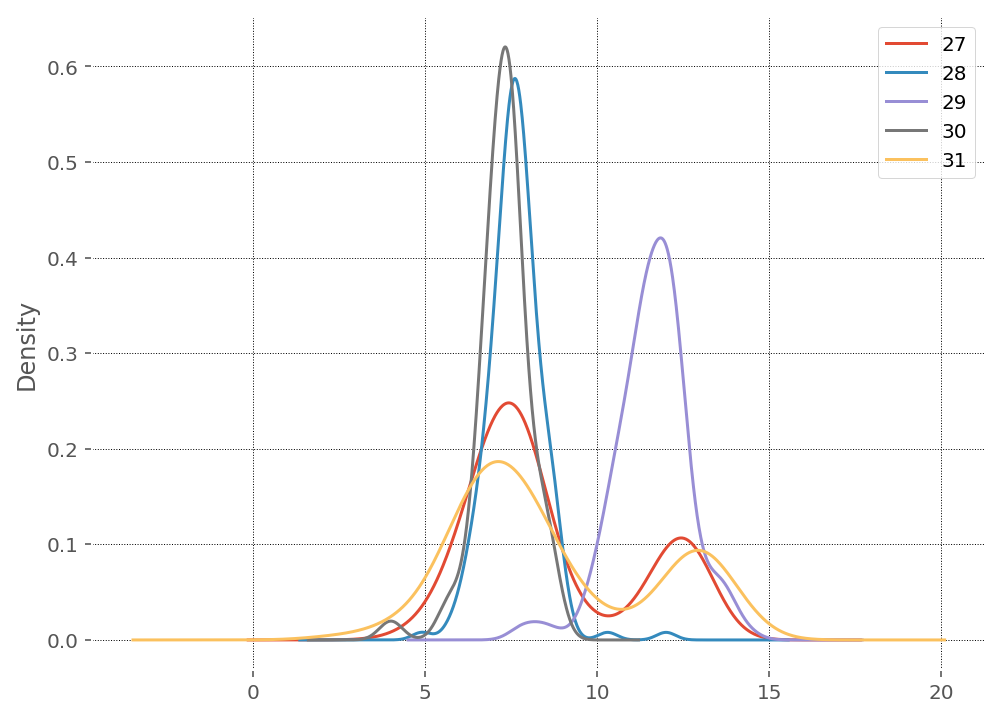

In [14]:
p_df = sample.set_index('EVT_DTM').between_time('09:00:00','09:30:00')
p_df = p_df[(p_df.FREQ_TYP_CD == 5) & (p_df.DAY == 'Monday')]

p_df = pd.DataFrame({"group":p_df['WEEK_NUM'],"value":p_df['CQI']})
fig,ax = plt.subplots(figsize=(8,6))

for label,df in p_df.groupby('group'):
    df.value.plot(kind="kde", ax=ax, label=label)
plt.legend()

In [15]:
p_df.groupby(['group'])['value'].##
p_df.groupby(['group'])['value'].##

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
27,241.0,8.603734,2.357193,4.3,7.000,7.80,10.60,13.2
28,180.0,7.618333,0.789277,4.9,7.200,7.60,8.00,12.0
29,180.0,11.583333,1.067054,7.8,11.000,11.70,12.20,14.4
30,60.0,7.273333,0.764435,4.0,6.900,7.35,7.60,8.8
31,240.0,8.675833,2.822103,2.4,6.675,7.75,11.85,14.2


group
27     7.80
28     7.60
29    11.70
30     7.35
31     7.75
Name: value, dtype: float64

### Uplink

### Usage

-----
# Model

## Expected Maximization 

https://scikit-learn.org/stable/modules/mixture.html

The GaussianMixture object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data.      
      
A **GaussianMixture.fit** method is provided that learns a Gaussian Mixture Model from train data. Given test data, it can assign to each sample the Gaussian it mostly probably belong to using the **GaussianMixture.predict** method.

**Pros**
 - Speed: It is the _fastest algorithm_ for learning mixture models.
 - Agnostic: As this algorithm maximizes only the likelihood, it will _not bias the means towards zero_, or bias the cluster sizes to have specific structures that might or might not apply.
 
**Cons**
 - Singularity: _When one has insufficiently many points per mixture_, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
 - Number of Components: This algorithm will _always use all the components_ it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.

## sklearn.mixture.GaussianMixture¶

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html      
https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py

**Step**
 1. defining training set : considering reference period
 2. modeling : construct EM curve
 3. inferencing
 4. interpreting the result & drawing conclusion

**Case**
 - Cell: 18579/12
 - Monday, 09:00 ~ 09:30
 - KPI : CQI
 - training : WEEK 27~30
 - inferencing : WEEK 31

### Training set

#### pd

In [5]:
tar = tarfile.open(os.path.join(path,'1807_TOY_X.tar'))
len(tar.getnames()); tar.getnames()[0:10]

8064

['TOY_X',
 'TOY_X/33154_0_20180719_201807191200_.csv',
 'TOY_X/28355_21_20180729_201807292000_.csv',
 'TOY_X/33538_4_20180707_201807072000_.csv',
 'TOY_X/28074_1_20180727_201807271700_.csv',
 'TOY_X/34182_7_20180727_201807271500_.csv',
 'TOY_X/18579_12_20180707_201807071600_.csv',
 'TOY_X/28063_12_20180712_201807121100_.csv',
 'TOY_X/28063_12_20180710_201807101800_.csv',
 'TOY_X/20157_12_20180719_201807191700_.csv']

In [6]:
f_list = ##(tar.getnames(), "*18579_12*")
len(f_list); f_list[0:5]

404

['TOY_X/18579_12_20180707_201807071600_.csv',
 'TOY_X/18579_12_20180722_201807221700_.csv',
 'TOY_X/18579_12_20180717_201807171500_.csv',
 'TOY_X/18579_12_20180702_201807021100_.csv',
 'TOY_X/18579_12_20180712_201807121200_.csv']

In [9]:
f_pd = pd.DataFrame()

for member in f_list:
    f = tar.extractfile(member)
    fpd = pd.read_csv(f, header = 0)
    f_pd = f_pd.append(fpd, sort=True)

f_pd.shape; f_pd.head(3); f_pd.tail(3)

(163068, 24)

,CELL_ID,CQI,DL_NO_RTP,DL_PACKET_LOSS_RATE,DL_PRB_USAGE_RATE,ENB_ID,ERAB_LATENCY,EVT_DTM,FREQ_TYP_CD,HO_LATENCY,PHR,RRC_ERAB_LATENCY,RRC_LATENCY,RRE_LATENCY,RSRP,RSRQ,SINR,TA,UE_CONN_TOT_CNT,UE_TX_POWER,UL_NO_RTP,UL_PACKET_LOSS_RATE,UL_PRB_USAGE_RATE,VEND_ID
0,12,12.6,0,0.0,5.0,18579,41.4,20180707155000,5,NaN,46.5,100.0,58.6,NaN,NaN,NaN,9.0,13.3,3,-5.0,0,0.0,NaN,SS
1,12,12.8,0,0.0,6.2,18579,23.9,20180707155010,5,NaN,42.5,57.7,33.8,NaN,NaN,NaN,10.2,14.2,6,-0.7,0,0.0,NaN,SS
2,12,12.6,0,0.0,9.2,18579,22.4,20180707155020,5,NaN,44.9,54.0,31.6,NaN,NaN,NaN,9.6,14.0,5,-2.8,0,0.0,NaN,SS


,CELL_ID,CQI,DL_NO_RTP,DL_PACKET_LOSS_RATE,DL_PRB_USAGE_RATE,ENB_ID,ERAB_LATENCY,EVT_DTM,FREQ_TYP_CD,HO_LATENCY,PHR,RRC_ERAB_LATENCY,RRC_LATENCY,RRE_LATENCY,RSRP,RSRQ,SINR,TA,UE_CONN_TOT_CNT,UE_TX_POWER,UL_NO_RTP,UL_PACKET_LOSS_RATE,UL_PRB_USAGE_RATE,VEND_ID
417,12,12.9,0,0.0,NaN,18579,21.5,20180701100930,5,NaN,41.0,52.0,30.5,NaN,NaN,NaN,8.8,14.5,4,1.3,0,0.0,NaN,SS
418,12,13.5,0,0.0,NaN,18579,22.6,20180701100940,5,NaN,44.5,54.5,31.9,NaN,NaN,NaN,9.5,14.0,2,-2.0,0,0.0,NaN,SS
419,12,12.8,0,0.0,NaN,18579,21.9,20180701100950,5,NaN,0.5,53.0,31.1,NaN,NaN,NaN,3.0,15.0,1,23.0,0,NaN,NaN,SS


In [11]:
f_pd['EVT_DTM']  = pd.to_datetime(f_pd['EVT_DTM'], format="%Y%m%d%H%M%S")
f_pd['DAY']      = f_pd['EVT_DTM'].dt.day_name()
f_pd['WEEK_NUM'] = f_pd['EVT_DTM'].dt.week
f_pd['DATE']     = f_pd['EVT_DTM'].dt.date
f_pd['TIME']     = f_pd['EVT_DTM'].dt.time

f_pd = f_pd.set_index('EVT_DTM').between_time('09:00:00','09:30:00')
f_pd = f_pd[f_pd.DAY == 'Monday']

f_pd.shape; f_pd.head(3); f_pd.tail(3)

(1205, 27)

,CELL_ID,CQI,DL_NO_RTP,DL_PACKET_LOSS_RATE,DL_PRB_USAGE_RATE,ENB_ID,ERAB_LATENCY,FREQ_TYP_CD,HO_LATENCY,PHR,RRC_ERAB_LATENCY,RRC_LATENCY,RRE_LATENCY,RSRP,RSRQ,SINR,TA,UE_CONN_TOT_CNT,UE_TX_POWER,UL_NO_RTP,UL_PACKET_LOSS_RATE,UL_PRB_USAGE_RATE,VEND_ID,DAY,WEEK_NUM,DATE,TIME
EVT_DTM,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-16 09:00:00,12,12.4,0,0.0,30.8,18579,28.2,5,NaN,39.0,68.1,39.9,NaN,NaN,NaN,7.3,14.6,20,2.2,0,0.0,NaN,SS,Monday,29,2018-07-16,09:00:00
2018-07-16 09:00:10,12,12.4,0,0.0,33.0,18579,30.0,5,NaN,39.8,72.4,42.4,NaN,-110.0,-12.3,5.9,14.5,35,0.5,0,0.0,NaN,SS,Monday,29,2018-07-16,09:00:10
2018-07-16 09:00:20,12,11.3,0,0.0,47.6,18579,28.5,5,NaN,40.8,68.9,40.3,NaN,-85.0,-15.5,6.8,14.3,22,1.5,0,0.0,NaN,SS,Monday,29,2018-07-16,09:00:20


,CELL_ID,CQI,DL_NO_RTP,DL_PACKET_LOSS_RATE,DL_PRB_USAGE_RATE,ENB_ID,ERAB_LATENCY,FREQ_TYP_CD,HO_LATENCY,PHR,RRC_ERAB_LATENCY,RRC_LATENCY,RRE_LATENCY,RSRP,RSRQ,SINR,TA,UE_CONN_TOT_CNT,UE_TX_POWER,UL_NO_RTP,UL_PACKET_LOSS_RATE,UL_PRB_USAGE_RATE,VEND_ID,DAY,WEEK_NUM,DATE,TIME
EVT_DTM,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-09 09:09:30,12,10.8,0,0.0,91.2,18579,30.8,5,NaN,39.4,74.4,43.6,NaN,-101.0,-17.0,6.5,14.4,38,1.1,0,0.0,NaN,SS,Monday,28,2018-07-09,09:09:30
2018-07-09 09:09:40,12,10.5,0,0.0,86.7,18579,31.6,5,NaN,40.6,76.3,44.7,NaN,-95.5,-15.8,7.0,14.3,23,1.4,0,0.0,NaN,SS,Monday,28,2018-07-09,09:09:40
2018-07-09 09:09:50,12,10.9,0,0.0,85.1,18579,31.0,5,NaN,38.7,74.8,43.8,NaN,-82.0,-18.0,7.4,14.4,27,2.7,0,0.0,NaN,SS,Monday,28,2018-07-09,09:09:50


In [13]:
pd.unique(f_pd['WEEK_NUM'])

array([29, 30, 28, 27, 31])

#### pd to np

In [15]:
W27 = ##
W28 = ##
W29 = ##
W30 = ##

len(W27);len(W28); len(W29); len(W30)

241

241

241

241

In [16]:
W31 = ##
len(W31)

241

#### np set

In [17]:
X = np.vstack([W27, W28, W29, W30])
len(X); X.shape; X[1:5]

964

(964, 1)

array([[11.9],
       [12.4],
       [12.5],
       [12.4]])

### Modeling

In [42]:
?mixture.GaussianMixture

In [18]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']

for cv_type in cv_types:
    for n_components in n_components_range:
        
        gmm = ##(n_components=n_components,covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
clf = best_gmm; print("Best GMM",clf)
bars = []

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=1, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=2, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=3, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=4, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=5, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=6, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Best GMM GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


<Figure size 576x432 with 0 Axes>

([<matplotlib.axis.XTick at 0x1a1e0ae898>,
 <a list of 6 Text xticklabel objects>)

(1616.892969026715, 1714.3287545984667)

Text(0.5, 1.0, 'BIC score per model')

Text(2.05, 1620.751812019656, '*')

Text(0.5, 0, 'Number of components')

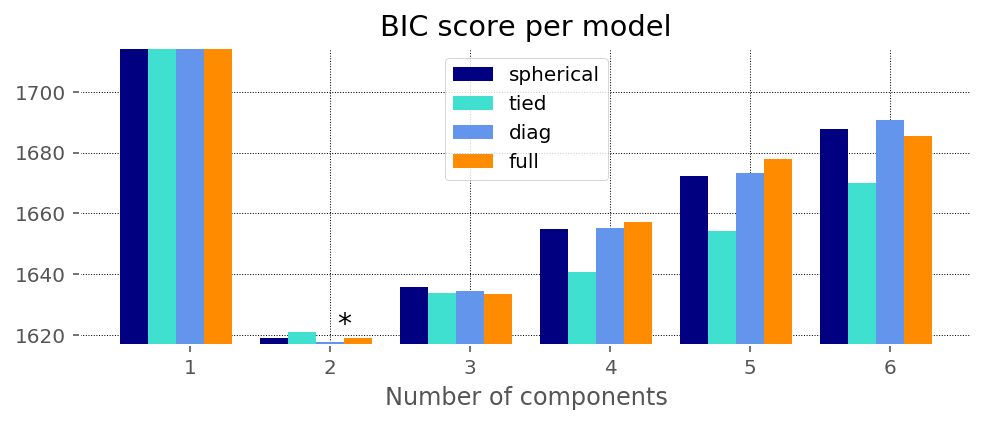

In [19]:
# Plot the BIC scores

color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue','darkorange'])
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [21]:
logprob = clf.##(X)
pdf = ##

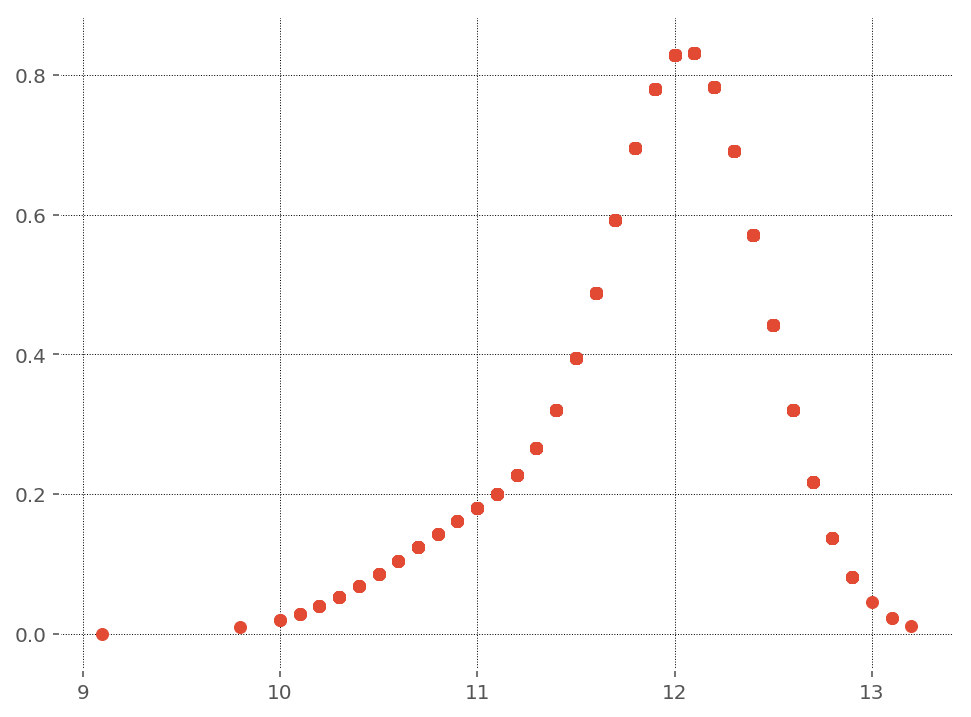

In [22]:
plt.scatter(X,pdf)
plt.show()

In [40]:
X.shape; pdf.shape

(964, 1)

(964,)

In [59]:
X_ = X
X_.shape = pdf.shape; X_.shape

(964,)

In [67]:
X_fine_ = pd.DataFrame({"X":X_, "X_pdf":pdf})
X_fine_ = X_fine_.drop_duplicates()
X_fine_.shape; X_fine_.head(3)

(35, 2)

,X,X_pdf
0,12.4,0.571568
1,11.9,0.780346
3,12.5,0.442294


### Scoring

In [80]:
W31_density = ##
W31_density
len(W31_density[0]); len(W31_density[1])

(array([0.12628541, 0.25257081, 0.        , 0.18942811, 0.50514162,
        0.        , 0.        , 0.0631427 , 0.        , 0.44199892,
        1.64171027, 0.        , 0.50514162, 0.82085513, 0.        ,
        0.63142703, 1.07342594, 0.        , 1.07342594, 1.19971135,
        0.        , 2.02056648, 1.83113837, 0.        , 0.63142703,
        0.56828432, 0.        , 0.82085513, 0.37885622, 0.        ,
        0.18942811, 0.0631427 , 0.        , 0.12628541, 0.0631427 ]),
 array([10.5       , 10.56571429, 10.63142857, 10.69714286, 10.76285714,
        10.82857143, 10.89428571, 10.96      , 11.02571429, 11.09142857,
        11.15714286, 11.22285714, 11.28857143, 11.35428571, 11.42      ,
        11.48571429, 11.55142857, 11.61714286, 11.68285714, 11.74857143,
        11.81428571, 11.88      , 11.94571429, 12.01142857, 12.07714286,
        12.14285714, 12.20857143, 12.27428571, 12.34      , 12.40571429,
        12.47142857, 12.53714286, 12.60285714, 12.66857143, 12.73428571,
        12.

35

36

In [88]:
Y_ = pd.DataFrame({"Y_":np.round(W31_density[1][1:],1), "Y_pdf":W31_density[0]})
Y_.shape; Y_.head(3)

(35, 2)

,Y_,Y_pdf
0,10.6,0.126285
1,10.6,0.252571
2,10.7,0.000000


In [89]:
eval_ = X_fine_.merge(Y_, left_on='X', right_on='Y_', how='outer')
eval_.shape; eval_.head()

(47, 4)

,X,X_pdf,Y_,Y_pdf
0,12.4,0.571568,12.4,0.378856
1,11.9,0.780346,11.9,0.000000
2,11.9,0.780346,11.9,2.020566
3,12.5,0.442294,12.5,0.000000
4,12.5,0.442294,12.5,0.189428


In [91]:
GAP = ##
GAP.head()

0    0.192712
1    0.780346
2    1.240221
3    0.442294
4    0.252866
dtype: float64

In [92]:
score = ##
score

37.874272313361615

----
# *End of Python*#